In [154]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import math

In [117]:
Data=[3,  96,  26,  35,  52,  58,  56,  87,  35.1,  2,  78,  57,  29,  87.1,  79,  82,  2.1,  29.1,
      41,  94, 89,  4,  6,  57.1,  80, 44, 26,  4.1,  47,  77,  48,  39,  23,  97,  49,  98,  9,  13,  
      92,  64,  55,  15,  26.1,  66,  41.1,  53,  25,  8,  9.1, 19,  98.1,  84,  53.1,  60,  48.1,  66.1,
      17,  36,  91,  55.1,  80.1,  74,  21,  77.1,  91.1,  35.2,  72,  58.1,  68,  68.1,  79.1,  61,  58.2, 
      47.1,  38,  65,  75,  66.2,  86,  4.2]
df = pd.DataFrame(Data, columns=['values'])
df.head()

,values
0,3.0
1,96.0
2,26.0
3,35.0
4,52.0


In [214]:
min_value=df.min()[0]
max_value=df.max()[0]
df = df.sort_values(by='values')
r= max_value-min_value
# r=round(r,4)
no_of_classes=10
h=r/no_of_classes
h=round(h)
# print(h)
lower_class_limit = [min_value] 
for i in range(1,no_of_classes):
    lower_class_limit.append(lower_class_limit[i -1] + h)  
# print(lower_class_limit)
upper_class_limit=[lower_class_limit[1]-0.1]
for i in range(1,no_of_classes):
    upper_class_limit.append(upper_class_limit[i -1] + h)  
# print(upper_class_limit)
lower_boundaries=[]
upper_boundaries=[]
boundary_diff=(lower_class_limit[1]-upper_class_limit[0])/2
for i in range(0,no_of_classes):
    lower_boundaries.append(lower_class_limit[i]-boundary_diff)
    upper_boundaries.append(upper_class_limit[i]+boundary_diff)
# print(lower_boundaries)
# print(upper_boundaries)
frequency_counts=[]
for j in range(0,no_of_classes):
    count=0
    list = df['values'].tolist() 
    for i in range(0,len(list)): 
        if lower_class_limit[j] <=list[i]<=upper_class_limit[j]:
            count+=1
    frequency_counts.append(count)
commulative=[frequency_counts[0]]
for i in range(1,len(frequency_counts)):
    commulative.append(commulative[i-1]+frequency_counts[i])
# print(commulative)
# print(frequency_counts)
frequency_table=pd.DataFrame({"Lower Class":lower_class_limit,
                             "Upper Class":upper_class_limit,
                             "Lower Boundaries":lower_boundaries, 
                             "Upper Boundaries":upper_boundaries,
                             "Frequency":frequency_counts,
                             "Commulative Frequency":commulative})
# print(frequency_table)
print(frequency_table)
n=sum(frequency_counts)
print('Sum if Frequencies (n) ',n)

   Lower Class  Upper Class  Lower Boundaries  Upper Boundaries  Frequency  \
0          2.0         11.9              1.95             11.95         10   
1         12.0         21.9             11.95             21.95          5   
2         22.0         31.9             21.95             31.95          7   
3         32.0         41.9             31.95             41.95          8   
4         42.0         51.9             41.95             51.95          6   
5         52.0         61.9             51.95             61.95         13   
6         62.0         71.9             61.95             71.95          7   
7         72.0         81.9             71.95             81.95         10   
8         82.0         91.9             81.95             91.95          8   
9         92.0        101.9             91.95            101.95          6   

   Commulative Frequency  
0                     10  
1                     15  
2                     22  
3                     30  
4     

/var/folders/jl/9q3v1knd3vsbl_7q_s5jjnnw0000gn/T/ipykernel_23500/3061543239.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_value=df.min()[0]
/var/folders/jl/9q3v1knd3vsbl_7q_s5jjnnw0000gn/T/ipykernel_23500/3061543239.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_value=df.max()[0]


In [217]:
def ArithmaticMean(df):
    df['Midpoint(x)']= (df['Lower Class']+df['Upper Class'])/2
    df['fx']=df["Frequency"]*df['Midpoint(x)']
    sum=df['Frequency'].sum()
    sum_fx=df['fx'].sum()
    mean=sum_fx/sum
    print(f"Arithmatic Mean: {mean}")
    return mean
arithmatic_mean=ArithmaticMean(frequency_table)
print(f'Arithmatic mean: {arithmatic_mean}')

def GeometricMean(df):
    df['Midpoint(x)']= (df['Lower Class']+df['Upper Class'])/2
    df['Log(x)']=np.log(df['Midpoint(x)'])
    df['fLogx']=df['Frequency']*df["Log(x)"]
    sum_fLogx=df['fLogx'].sum()
    n=df["Frequency"].sum()
    mean=np.exp(sum_fLogx/n)
    return mean
geometric_mean=GeometricMean(frequency_table)
print(f'Geometric mean: {geometric_mean}')


def HarmonicMean(df): 
    df['Midpoint(x)']= (df['Lower Class']+df['Upper Class'])/2
    df['f/x']=df["Frequency"]/df['Midpoint(x)']
    sum_fx=df['f/x'].sum()
    sum=df['Frequency'].sum()
    mean=sum/sum_fx
    return mean
harmonic_mean=HarmonicMean(frequency_table)
print(f'Harmonic mean: {harmonic_mean}')

def CalculateMode(df):
    m_class= df['Frequency'].idxmax()
    l=df['Lower Boundaries'][m_class]
    fm=df['Frequency'][m_class]
    f1=df['Frequency'][m_class-1]
    f2=df['Frequency'][m_class+1]
    h=df['Upper Boundaries'][m_class]-df['Lower Boundaries'][m_class]
    mode= l+((fm-f1)/((fm-f1)+(fm-f2)))*h
    return mode
mode=CalculateMode(frequency_table)
print(f'Mode: {mode}')

def CalculateMedian(df): 
    sum=df['Frequency'].sum()
    nby2=sum/2
    m_class=df[df['Commulative Frequency'] >=nby2].index[0]
    c=df['Commulative Frequency'][m_class-1]
    h=df['Upper Boundaries'][m_class]-df['Lower Boundaries'][m_class]
    f=df['Frequency'][m_class]
    l=df['Lower Boundaries'][m_class]
    median=l+((h/f)*(nby2-c))
    return median
median=CalculateMedian(frequency_table)
print(f'Median: {median}')

Arithmatic Mean: 52.2
Arithmatic mean: 52.2
Geometric mean: 41.02931277176559
Harmonic mean: 27.07684666218177
Mode: 57.33461538461538
Median: 55.026923076923076


In [221]:
def CalculateQartile(df,qartile):
    sum=df['Frequency'].sum()
    inby4=qartile*(sum/4)
    q_class=df[df['Commulative Frequency'] >=inby4].index[0]
    f=df['Frequency'][q_class]
    l=df['Lower Boundaries'][q_class]
    h=df['Upper Boundaries'][q_class]-df['Lower Boundaries'][q_class]
    c=df['Commulative Frequency'][q_class-1] if q_class > 0 else 0
    q=l+((h/f)*(inby4-c))
    return q
Q1=CalculateQartile(frequency_table,1)
Q2=CalculateQartile(frequency_table,2)
Q3=CalculateQartile(frequency_table,3)
print(f'Q1: {Q1}\nQ2: {Q2}\nQ3: {Q3}')
def CalculateDecile(df,decile):
    sum=df['Frequency'].sum()
    inby10=decile*(sum/10)
    d_class=df[df['Commulative Frequency'] >=inby10].index[0]
    f=df['Frequency'][d_class]
    l=df['Lower Boundaries'][d_class]
    h=df['Upper Boundaries'][d_class]-df['Lower Boundaries'][d_class]
    c=df['Commulative Frequency'][d_class-1] if d_class > 0 else 0
    d=l+((h/f)*(inby10-c))
    return d
D5=CalculateDecile(frequency_table,5)
D2=CalculateDecile(frequency_table,2)
D7=CalculateDecile(frequency_table,7)
print(f'D2:{D2}\nD5: {D5}\nD7: {D7}')

def CalculatePercentile(df,percentile):
    sum=df['Frequency'].sum()
    inby100=percentile*(sum/100)
    p_class=df[df['Commulative Frequency'] >=inby100].index[0]
    f=df['Frequency'][p_class]
    l=df['Lower Boundaries'][p_class]
    h=df['Upper Boundaries'][p_class]-df['Lower Boundaries'][p_class]
    c=df['Commulative Frequency'][p_class-1] if p_class > 0 else 0
    p=l+((h/f)*(inby100-c))
    return p
P10=CalculatePercentile(frequency_table,10)
P25=CalculatePercentile(frequency_table,25)
P50=CalculatePercentile(frequency_table,50)
P80=CalculatePercentile(frequency_table,80)
print(f'P10: {P10}\nP25: {P25}\nP50: {P50}\nP80: {P80}')

Q1: 29.09285714285714
Q2: 55.026923076923076
Q3: 75.95
D2:23.378571428571426
D5: 55.026923076923076
D7: 71.95
P10: 9.95
P25: 29.09285714285714
P50: 55.026923076923076
P80: 79.95


In [222]:
def CalculateDispersion(df):
    r=df['Frequency'].max()-df['Frequency'].min()
    coef_r=((df['Frequency'].max()-df['Frequency'].min())/(df['Frequency'].max()+df['Frequency'].min()))
    print(f"Coefficient of range: {coef_r}")
    Q1=CalculateQartile(frequency_table,1)
    Q3=CalculateQartile(frequency_table,3)
    coef_qartile=(Q3-Q1)/2
    print(f"Coefficient of IQR: {coef_qartile}")
    mean=ArithmaticMean(frequency_table)
    df['Midpoint(x)']= (df['Lower Class']+df['Upper Class'])/2
    df['x-mean']=abs(df['Midpoint(x)']-mean)
    df['f(x-mean)']=df['Frequency']*df['x-mean']
    sum=df['f(x-mean)'].sum()
    n=df['Frequency'].sum()
    mean_deviation=sum/n
    print(f"Mean Deviation: {mean_deviation}")
    coef_of_md=(mean_deviation/mean)*100
    print(f"Coefficient of mean deviation: {coef_of_md}%")
    df['x^2']=df['Midpoint(x)']**2
    sumx2=df['x^2'].sum()
    sumx=df['Midpoint(x)'].sum()
    sumxbyn=sumx/n
    sumxbyn=sumxbyn**2
    variance=(sumx2/n)-sumxbyn
    print(f'Variance: {variance}')
    sd= math.sqrt((sumx2/n)-(sumxbyn))
    print(f'Standard Daviation: {sd}')
CalculateDispersion(frequency_table)


    

Coefficient of range: 0.4444444444444444
Coefficient of IQR: 23.42857142857143
Arithmatic Mean: 52.2
Mean Deviation: 23.975
Coefficient of mean deviation: 45.92911877394636%
Variance: 398.3065234375
Standard Daviation: 19.957618180471837


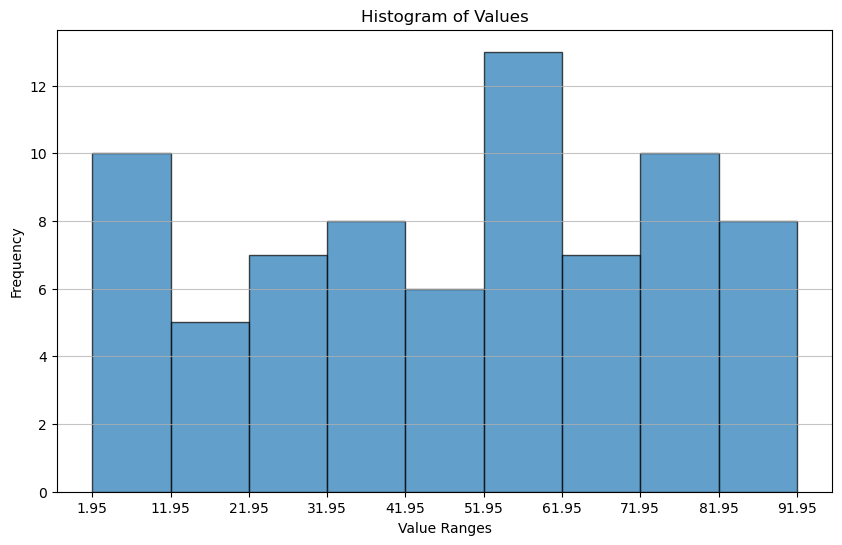

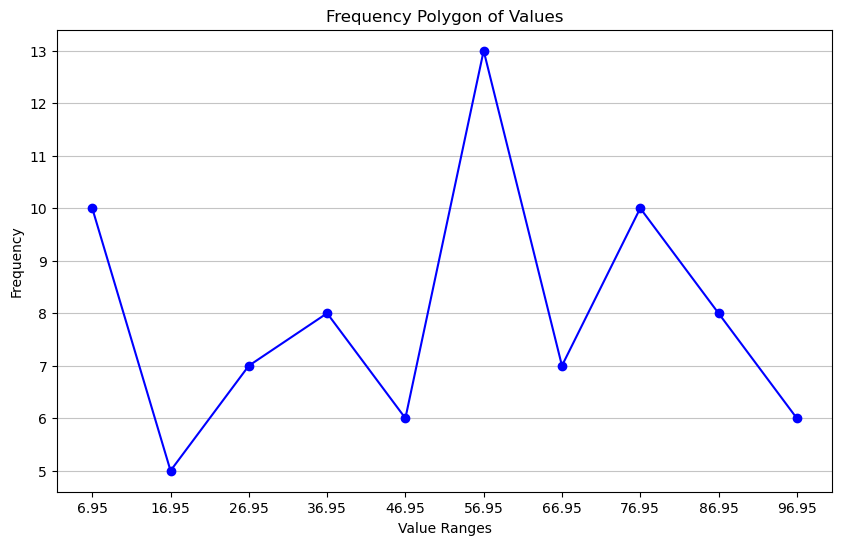

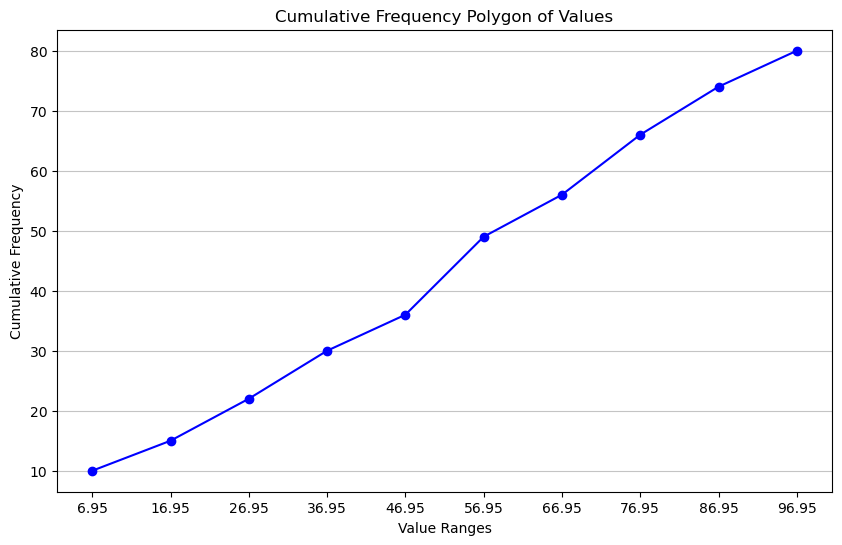

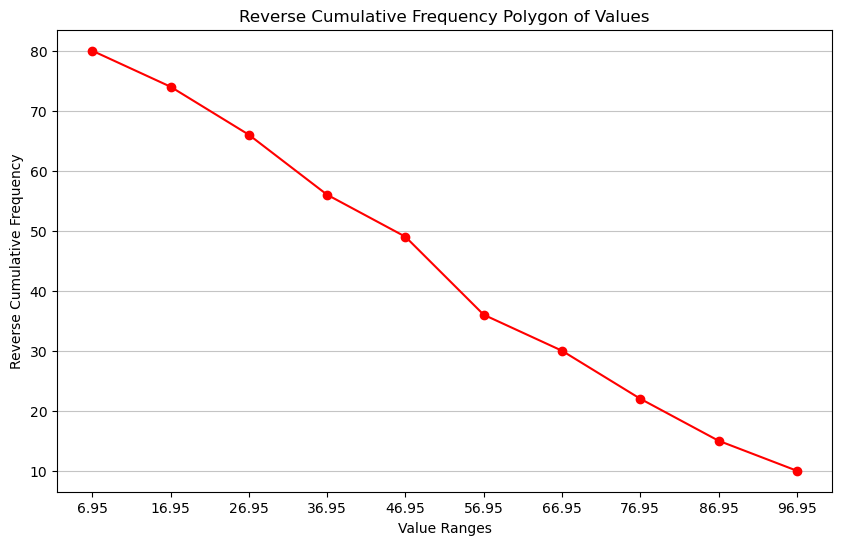

In [225]:
plt.figure(figsize=(10, 6))
plt.hist(df['values'], bins=[lower_boundaries[i] for i in range(len(lower_boundaries))], edgecolor='black', alpha=0.7)
plt.title('Histogram of Values')
plt.xlabel('Value Ranges')
plt.ylabel('Frequency')
plt.xticks([lower_boundaries[i] for i in range(len(lower_boundaries))])
plt.grid(axis='y', alpha=0.75)
plt.show()
    
midpoints = [(lower_boundaries[i] + upper_boundaries[i]) / 2 for i in range(no_of_classes)]
plt.figure(figsize=(10, 6))
plt.plot(midpoints, frequency_counts, marker='o', linestyle='-', color='b')
plt.title('Frequency Polygon of Values')
plt.xlabel('Value Ranges')
plt.ylabel('Frequency')
plt.xticks(midpoints)
plt.grid(axis='y', alpha=0.75)
plt.show()

cumulative_frequency = [sum(frequency_counts[:i+1]) for i in range(len(frequency_counts))]
midpoints = [(lower_boundaries[i] + upper_boundaries[i]) / 2 for i in range(no_of_classes)]
plt.figure(figsize=(10, 6))
plt.plot(midpoints, cumulative_frequency, marker='o', linestyle='-', color='b')
plt.title('Cumulative Frequency Polygon of Values')
plt.xlabel('Value Ranges')
plt.ylabel('Cumulative Frequency') 
plt.xticks(midpoints)
plt.grid(axis='y', alpha=0.75)
plt.show()


reverse_cumulative_frequency = cumulative_frequency[::-1]
midpoints = [(lower_boundaries[i] + upper_boundaries[i]) / 2 for i in range(no_of_classes)]
plt.figure(figsize=(10, 6))
plt.plot(midpoints, reverse_cumulative_frequency, marker='o', linestyle='-', color='r')
plt.title('Reverse Cumulative Frequency Polygon of Values')
plt.xlabel('Value Ranges')
plt.ylabel('Reverse Cumulative Frequency')
plt.xticks(midpoints)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [121]:
bins = [lower_class_limit[0]] + upper_class_limit

# Print bins
print("Bins:", bins)

# Classify the data
df['Class'] = pd.cut(df['values'], bins=bins, right=True, include_lowest=True)

# Count frequencies
frequency_counts = df['Class'].value_counts(sort=False)

# Print results
print("Frequency counts:")
print(frequency_counts)
print("Total observations:", len(df['values']))
print("Sum of frequencies:", frequency_counts.sum())

# Check for unique values in the dataset
print("Unique values in data:", df['values'].unique())
print("Data types:", df['values'].dtype)

Bins: [2.0, 11.9, 21.9, 31.9, 41.9, 51.9, 61.9, 71.9, 81.9, 91.9, 101.9]
Frequency counts:
Class
(1.999, 11.9]    10
(11.9, 21.9]      5
(21.9, 31.9]      7
(31.9, 41.9]      8
(41.9, 51.9]      6
(51.9, 61.9]     13
(61.9, 71.9]      7
(71.9, 81.9]     10
(81.9, 91.9]      8
(91.9, 101.9]     6
Name: count, dtype: int64
Total observations: 80
Sum of frequencies: 80
Unique values in data: [ 2.   2.1  3.   4.   4.1  4.2  6.   8.   9.   9.1 13.  15.  17.  19.
 21.  23.  25.  26.  26.1 29.  29.1 35.  35.1 35.2 36.  38.  39.  41.
 41.1 44.  47.  47.1 48.  48.1 49.  52.  53.  53.1 55.  55.1 56.  57.
 57.1 58.  58.1 58.2 60.  61.  64.  65.  66.  66.1 66.2 68.  68.1 72.
 74.  75.  77.  77.1 78.  79.  79.1 80.  80.1 82.  84.  86.  87.  87.1
 89.  91.  91.1 92.  94.  96.  97.  98.  98.1]
Data types: float64
